## Text Classification

In [2]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import sys
!{sys.executable} -m pip install contractions

!pip install spacy
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pauri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pauri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pauri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pauri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/289.9 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------  286.7/289.9 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 289.9/289.9 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 640.0 kB/s eta 0:00:20
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 819.2 kB/s eta 0:00:16
     - -------------------------------------- 0.5/12.8 MB 3.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 4.4 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/12.8 MB 5.4 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 6.4 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.8 MB 7.2 

In [8]:
# importación de librerias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import re
import contractions
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from tqdm.autonotebook import tqdm
tqdm.pandas()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\673078296.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Cargar y preparar los datos

En primer lugar, cargaremos la base de datos descargada anteriormente con titulares de noticias falsas y noticias verdaderas.

In [13]:
dataset = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/PYTHON PROJECTS/CUA Big Data/fake_news_2_classification.csv",sep=";")

In [15]:
dataset

,title,fake
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,0
2,a g calls for infrastructure protection summit,0
3,air nz staff in aust strike for pay rise,0
4,air nz strike to affect australian travellers,0
...,...,...
59592,Stocks Pump'n'Dump As Crude Crumbles To 3-Week...,1
59593,Tesla Earnings Smash Expectations After Dramat...,1
59594,Rules For Rulers (Or How The World Really Works),1
59595,Caught On Tape: ISIS Destroys Iraqi Abrams Wit...,1


Vamos a comprobar el tamaño del dataset:

In [21]:
print("Tenemos un conjunto de {} documentos".format(len(dataset)))
print("El dataframe tiene {} columnas".format(dataset.shape[1]))

Tenemos un conjunto de 59597 documentos
El dataframe tiene 2 columnas


Despues, quitaremos las filas con algún valor vacio (NA) y quitaremos los duplciados.

In [28]:
print("Existen {} noticias duplicadas".format(np.sum(dataset.duplicated(subset=["title"]))))
# Quitaremos esos duplicados 
dataset = dataset.drop_duplicates()
print("Despues de quitar duplicados tenemos un conjunto de {} noticias".format(dataset.shape[0]))

Existen 30 noticias duplicadas
Despues de quitar duplicados tenemos un conjunto de 59567 noticias


Después de esto, comprobamos que no  hayan quedado Nulls en ingunas de las dos columnas del dataset.

In [37]:
print("Hay {} valores vacíos en las noticias y {} valores vacíos en las etiquetas en los datos".format(np.sum(dataset.isnull())[0],np.sum(dataset.isnull())[1]))

Hay 0 valores vacíos en las noticias y 0 valores vacíos en las etiquetas en los datos


C:\Users\pauri\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\733624939.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Hay {} valores vacíos en las noticias y {} valores vacíos en las etiquetas en los datos".format(np.sum(dataset.isnull())[0],np.sum(dataset.isnull())[1]))


### Análisis preliminar

#### Etiquetas 

Vamos a comprobar el número de etiquetas de cada clase en la columna "fake", la columna correspondiente a las etiquetas.

In [40]:
dataset["fake"].value_counts()

fake
0    30000
1    29567
Name: count, dtype: int64

Disponemos de 30.000 noticias verdareas (valor 0) y 29.567 noticias falsas (valor 1).

Vamos a dibujar un histograma

NameError: name 'plot' is not defined

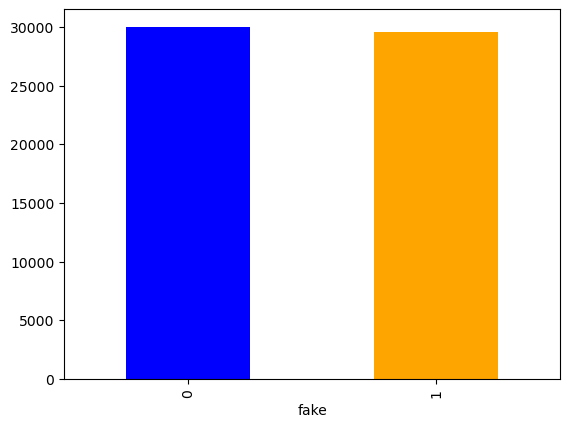

In [47]:
ax, fig = plt.subplots()
etiquetas = dataset.fake.value_counts()
etiquetas.plot(kind="bar",color=["blue","orange"])
plot.tilte("Bar chart")
plt.show()

### Transformación

Como hemos vista, está dividido en dos pasos Normaliazicón o Preprocesado y Transforamción.

### Normalización

Vamos a proceder a normalizar los datos. Para ello vamos a generar pequeñas funciones que nos permitan:

* Eliminar espacios extra.
* Transformar a minúsculas.
* Tokenizar
* Reemplazar contractions,
* Lematizar tokens.
* Eliminar stopwords
* Eliminar sígnos de puntuación

In [68]:
# Eliminamos espacios 
def eliminar_espacios(text):
    return " ".join(str(text).split())

# To lower 
def texto_to_lower(text):
    return str(text).lower()

# Tokenizar 
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

# Reemplazar contractions usando la librería "contractions"
def replace_contraction(text):
    expanded_words= []
    for t in text.split():
        expanded_words.append(contractions.fix(t))
    expanded_text = " ".join(expanded_words)
    return expanded_text

# Quitar stop words 
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words=set(stopwords.words("english"))
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

# Eliminar signos de puntuación 
def quitar_puntuacion(tokens):
    words = [word for word in tokens if word.isalnum()]
    return words

# Lemmatization
import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

import string
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem(tokens):
    tokens = [ stemmer.stem(token) for token in tokens]
    return tokens

Podríamos generar una función de transformación que aglutinara todas las anteriores y pasársela al siguiente paso (TfidfVectorizer) en el campo analyzer. Para ver el proceso de cada uno de los pasos lo haremos paso a paso:

In [73]:
# Espacios
dataset["normaliza"] = dataset["title"].progress_apply(lambda x: eliminar_espacios(x))
# To Lower
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: texto_to_lower(x))
# Contraciones
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: replace_contraction(x))
# Tokenizar
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: tokenization(x))
# Quitar Stopwords
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: quitar_stopwords(x))
# Quitar puntuación
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: quitar_puntuacion(x))
# Stemming
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: stem(x))
# Mirar todo lo que tarda con lematización (mediante spacy)
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: lematizar(x))

dataset["normaliza"]


  0%|          | 0/59567 [00:00<?, ?it/s]

C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\2628074229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["normaliza"] = dataset["title"].progress_apply(lambda x: eliminar_espacios(x))


  0%|          | 0/59567 [00:00<?, ?it/s]

C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\2628074229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: texto_to_lower(x))


  0%|          | 0/59567 [00:00<?, ?it/s]

C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\2628074229.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: replace_contraction(x))


  0%|          | 0/59567 [00:00<?, ?it/s]

C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\2628074229.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: tokenization(x))


  0%|          | 0/59567 [00:00<?, ?it/s]

C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\2628074229.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: quitar_stopwords(x))


  0%|          | 0/59567 [00:00<?, ?it/s]

C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\2628074229.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: quitar_puntuacion(x))


  0%|          | 0/59567 [00:00<?, ?it/s]

C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\2628074229.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: stem(x))


  0%|          | 0/59567 [00:00<?, ?it/s]

C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\2628074229.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: lematizar(x))


0                        aba decid commun broadcast licenc
1                             act fire wit must awar defam
2                      g call infrastructur protect summit
3                        air nz staff aust strike pay rise
4                   air nz strike affect australian travel
                               ...                        
59592                               stock crude crumbl low
59593    tesla earn smash expect dramat chang report me...
59594                         rule ruler world realli work
59595            catch tape isi destroy iraqi abram missil
59596    obamacar architect admit law work design premi...
Name: normaliza, Length: 59567, dtype: object

Como explicamos, se ha hecho el preprocesado, y antes de introducirlo a TFIDF vamos a generar una frase de cada una de las listas de tokens, para utilizar el propio tokenizados de TFIDF.

In [72]:
dataset["clean_text"] = dataset["normaliza"].progress_apply(lambda x: " ".join(x))

  0%|          | 0/59567 [00:00<?, ?it/s]

C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\3454612539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["clean_text"] = dataset["normaliza"].progress_apply(lambda x: " ".join(x))


C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\493501381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["token_len"] = dataset["normaliza"].apply(lambda x: len(x))
C:\Users\pauri\AppData\Local\Temp\ipykernel_2332\493501381.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(dataset[dataset["fake"]==0]["token_len"], hist=True, label="real")
C:\Users\pauri\AppData\Local\Temp\ipyker

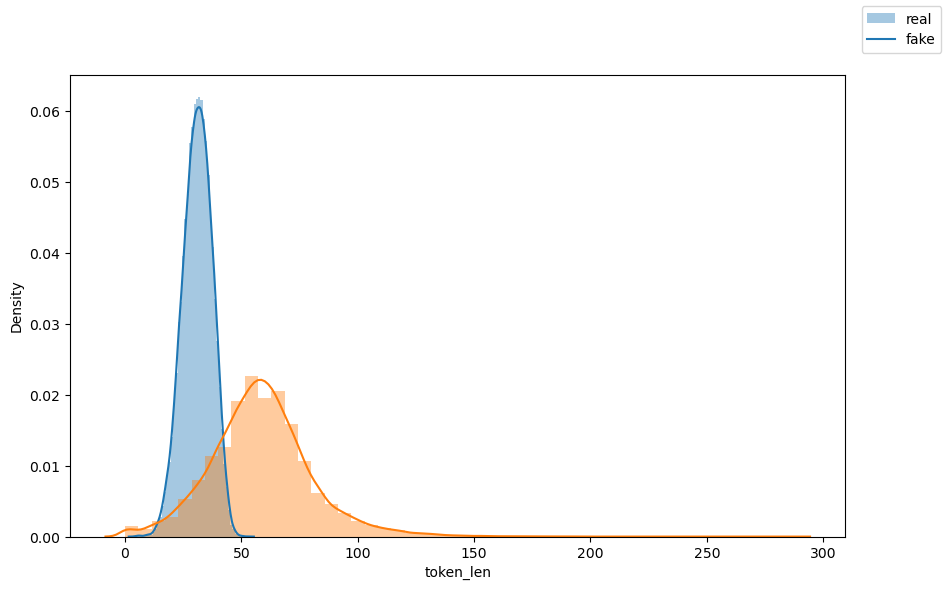

In [75]:
dataset["token_len"] = dataset["normaliza"].apply(lambda x: len(x))


fig = plt.figure(figsize=(10,6))
plt1 = sns.distplot(dataset[dataset["fake"]==0]["token_len"], hist=True, label="real")
plt2 = sns.distplot(dataset[dataset["fake"]==1]["token_len"], hist=True, label="fake")
fig.legend(labels=['real','fake'])
plt.show()

### Vectorización

Con todo generado, vamos a extraer las características utilizando TFIDVectorizer:

* Queremos utilziar como máximo 15.000 features 
* unigramas, bigramas y trigramas
* Que el sistema no considere los elementos que salgan en menos del 5% de los documentos

In [79]:
vectorizador = TfidfVectorizer(min_df=0.05,ngram_range = (1,2), max_features =300)
vector_data=vectorizador.fit_transform(dataset["normaliza"])

### Entrenaro/validar el clasificador:

En primer lugar, dividamos el dataset en Train/Test:

In [83]:
X_train,X_test,y_train,y_test = train_test_split(vector_data,dataset.fake,random_state=0)
print(X_train.shape)
print(X_test.shape)

(44675, 2)
(14892, 2)


Vamos a entrenar el modelo. Dado que es un problema binario, vamos a utilziar un regresor Logístico para realizar la clasificación. Los parámetros del regresor son "sovlers", "penalty", y "c_values" (el más importante). Vamos a hacer un grid_search para ver cuales son los mejores valores.

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# define modelos and parameters
model = LogisticRegression()
solvers = ["newton-cg","liblinear"]
penalty = ["l2"]
c_values =[100,10,1.0,0.1,0.01]

Vamos a generar un diccionario para la búsqueda Grid y también generaremos el objeto GridSearchCV. Vamos a utilizar una métrica de búsqueda basada en accuracy (por probar).

In [91]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=10,shuffle=True,random_state =1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

Entrenamos el modelo y hacemos un print del mejor resultado

In [94]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor accuracy: 0.704085 usando los parámetros {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


Podria interesarnos más otro de los resultados, así que vamos a mostrar todos. Primero asignamos la accuracy media de cada modelo a una variable (means), la std y los parametros y hacemos un bucle for.

In [98]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) con parámetros: %r" % (mean, stdev, param))

0.704085 (0.006972) con parámetros: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.704085 (0.006972) con parámetros: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.704085 (0.006972) con parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.704085 (0.006972) con parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.704085 (0.006972) con parámetros: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.704085 (0.006972) con parámetros: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.704085 (0.006972) con parámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.704085 (0.006972) con parámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.704085 (0.006972) con parámetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.704085 (0.006972) con parámetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
